# PRINCIPAUX INDICATEURS PERSONNELS DE MALADIE CARDIAQUE

Lien: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

# Analyse descriptive de la data set

le but de cette analyse est de comprendre chaque variable afin de connaitre comment on va les traiter avant de passer a l'entrainement.

## desription du dataset
**HeartDisease :** Répondants ayant déjà déclaré avoir eu une maladie coronarienne (MC) ou un infarctus du myocarde (IM).

**IMC :** Indice de masse corporelle (IMC).

**Smoking :** Avez-vous fumé au moins 100 cigarettes au cours de votre vie ?

**AlcoholDrinking :** Gros buveurs (hommes adultes ayant plus de 14 verres par semaine et femmes adultes ayant plus de 7 verres par semaine).

**Stroke :** (On vous a déjà dit) (que vous aviez) un AVC ?

**PhiysicalHealth :** Si vous pensez maintenant à votre santé physique, qui comprend les maladies et les blessures physiques, pendant combien de jours au cours des 30 derniers jours votre santé physique n'était-elle pas bonne ? (0-30 jours).

**MentalHeath :** Si vous pensez à votre santé mentale, pendant combien de jours au cours des 30 derniers jours votre santé mentale n'était-elle pas bonne ? (0-30 jours).

**DiffWalking :** Avez-vous de sérieuses difficultés à marcher ou à monter des escaliers ?

**Sex :** Êtes-vous un homme ou une femme ?

**AgeCategory :** Catégorie d'âge à quatorze niveaux. (puis calcul de la moyenne)

**Race :** Valeur imputée de la race/ethnicité.

**Diabetic :** (On vous a déjà dit) (que vous aviez) du diabète ?

**hysicalActivity (Activité physique) :** Adultes ayant déclaré avoir pratiqué une activité physique ou un exercice au cours des 30 derniers jours en dehors de leur travail habituel.

**GenHealth :** Diriez-vous qu'en général votre santé est...

**SleepTime :** En moyenne, combien d'heures de sommeil avez-vous par période de 24 heures ?

**Asthma :** (On vous a déjà dit) (que vous aviez) de l'asthme ?

**KidneyDisease :** Sans compter les calculs rénaux, les infections de la vessie ou l'incontinence, vous a-t-on déjà dit que vous aviez une maladie rénale ?

**SkinCancer :** (On vous a déjà dit) que vous aviez un cancer de la peau ?



<vide>

In [1]:
# importation des bibliotheques
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importation de la dataset
heart_data = pd.read_csv('../heart_2020_cleaned.csv')
heart_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Analyse exploratoire des donnees

## 1. Analyse de la forme

In [3]:
# les dimensions de la dataset
heart_data.shape

(319795, 18)

In [4]:
# les types des variables
heart_data.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [5]:
# infos sur les variables
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
# la description des variables qualitatives
heart_data.describe(include='object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


**Remarque:** Nous observons deja un probleme de desequilibre de classe au niveau de nos variables qualitative, nous allons mieux comprendre le pourquoi au cours de notre analyse

In [7]:
# description des variables quantitative
heart_data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


**Remarque:** nous voyons qu'il y'en a des personnes qui ont ete malade pendant 30 jours, d'autre dorment pendant 24h en moyen chaque jours, nousa allons essayer de mieux comprendre cela au cours de notre analyse

In [8]:
# Identification des valeurs manquantes
heart_data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

# 2. Analyse du fond

No     292422
Yes     27373
Name: HeartDisease, dtype: int64


<AxesSubplot:>

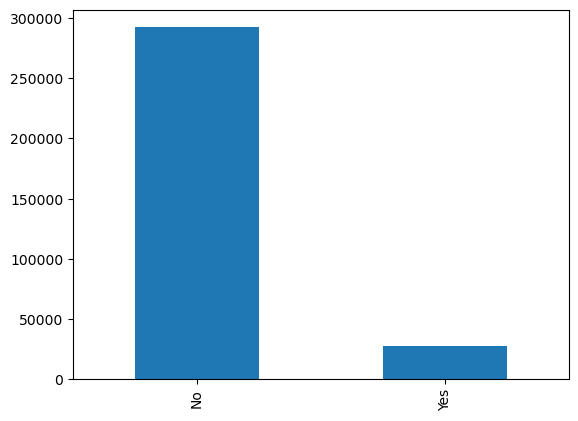

In [9]:
# visualisation de la target
print(heart_data.HeartDisease.value_counts())
heart_data.HeartDisease.value_counts().plot.bar()

**Remarque:** Il y a une enorme difference entre les deux valeurs, nous faisons face a un probleme de desequilibre de classe

## Analyses monovariees

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64 



Text(0.5, 1.0, "Categorie d'age")

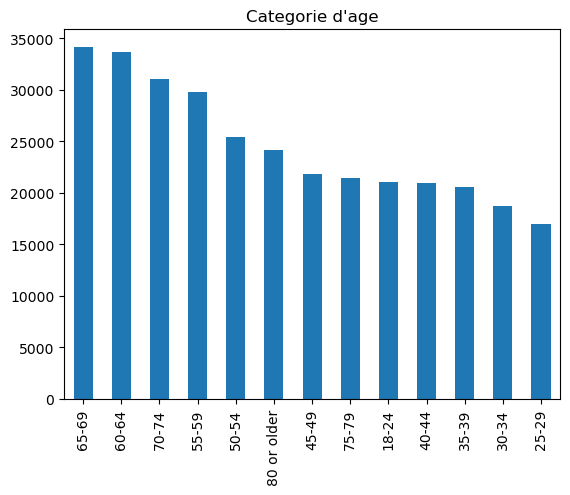

In [10]:
# la variable AgeCategory 
print(heart_data.AgeCategory.value_counts(), '\n')
heart_data.AgeCategory.value_counts().plot.bar().set_title("Categorie d'age")

**Remarque:** Nous remarquons qu'il y a une forte presence des personnes agees de 55 a 75 ans, ceci s'explique par le fait que les donnees ont ete collete a travers les appelles telephoniques.

No     187887
Yes    131908
Name: Smoking, dtype: int64 
 


Text(0.5, 1.0, 'Avoir deja fumer plus de 100 cigarette au cours de la vie')

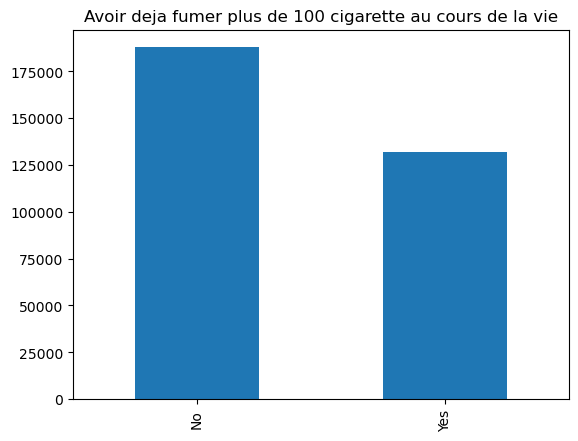

In [11]:
# la variable Smoking
print(heart_data.Smoking.value_counts(), '\n ')
heart_data.Smoking.value_counts().plot.bar().set_title('Avoir deja fumer plus de 100 cigarette au cours de la vie')

**Remaque:** Ces valeurs sont inquiettantes pour une personne qui se dit fumeuse, d'apres le site institutadios.com (le lien: https://institutadios.com/comment-arreter-de-fumer/quels-sont-les-risques-lies-au-tabac/statistique-tabac-les-chiffres-du-tabac-en-france-et-dans-le-monde/en-moyenne-combien-de-cigarettes-fume-un-fumeur-chaque-jour/), En général, le nombre de cigarettes qu’un fumeur fume par jour dépend de son âge. Les jeunes âgés de 12 à 25 ans fument en moyenne 10 cigarettes chaque jour.

Les adultes quant à eux, vont jusqu’à 15 cigarettes en 24 heures. Cependant, il faut souligner que ces chiffres ne sont qu’à titre indicatif.

Certains fumeurs qui présentent des signes de dépendance peuvent aller au-delà de ces moyennes nationales.

Or les ages vont de 25 a plus de 80 ans, donc il y deux hypothese:
- soit il y une erreur sur la description de la variables (" Avez-vous fumé au moins 100 cigarettes au cours de votre vie ?")
- soit les personnes interogees n'ont pas dit la verite

No     307726
Yes     12069
Name: Stroke, dtype: int64 



Text(0.5, 1.0, 'Teste de AVC')

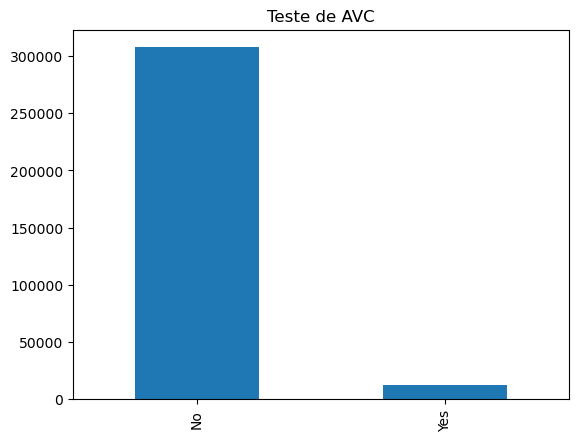

In [12]:
# la variable Stroke
print(heart_data.Stroke.value_counts(), '\n')
heart_data.Stroke.value_counts().plot.bar().set_title('Teste de AVC')

**Remarque:** ce desequilibre s'explique tout simplement par le fait que la plupart des personne qui subissent un attaque de AVC meurent generalement, c'est par miracle qu'on survie a une attaque de AVC. Nous pouvons aussi ajouter le fait que cette attaque n'arrive pas a tout le monde

Text(0.5, 1.0, "Le nombre de jours durant le mois ou votre sante physique n'est pas bonne")

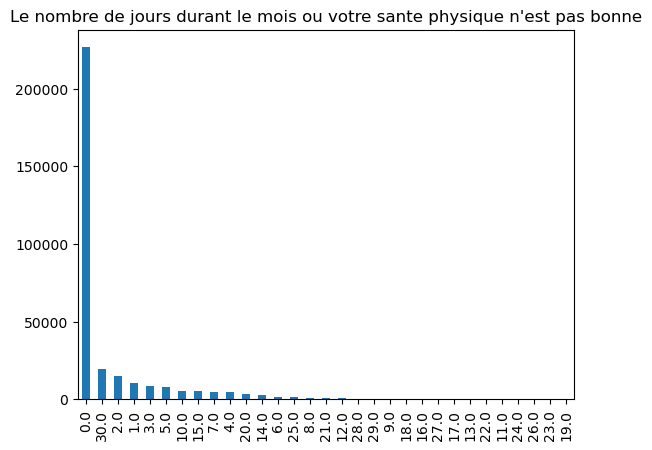

In [13]:
# la variable physicalheart
heart_data.PhysicalHealth.value_counts().plot.bar().set_title("Le nombre de jours durant le mois ou votre sante physique n'est pas bonne")

**Remarque:** il y a une importante quantite de personne qui ont ete en  bonne sante pendant les 30 jours precedant l'interogatoire, par contre il y'en a quand meme ceux que la maladie n'a pas epagne pendant ces temps, nous allons essayer de mieux comprendre les cause des ces maladies lors l'analyse multivariee.

Text(0.5, 1.0, "Le nombre de jours durant le mois ou votre sante mentale n'est pas bonne")

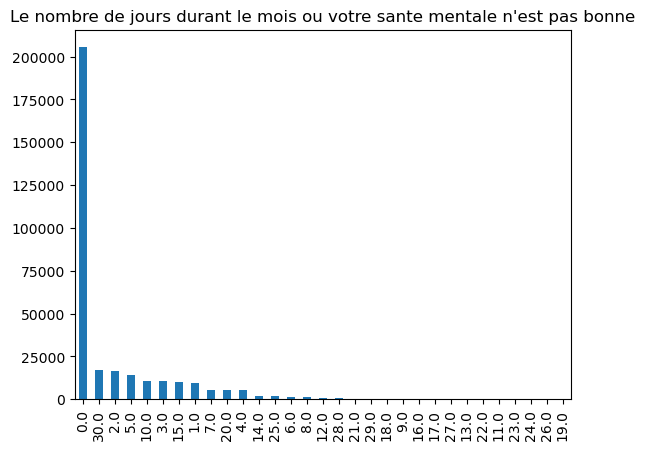

In [14]:
# la variable Mentalhearth
heart_data.MentalHealth.value_counts().plot.bar().set_title("Le nombre de jours durant le mois ou votre sante mentale n'est pas bonne")

**Remarque:** nous faisont la meme observation sur la cette variable qu'a la variable PhysicalHealth, nous allons essayer de voir si il y a une bonne correlation entre ces deux variables

No     275385
Yes     44410
Name: DiffWalking, dtype: int64


Text(0.5, 1.0, 'difficulte de marche')

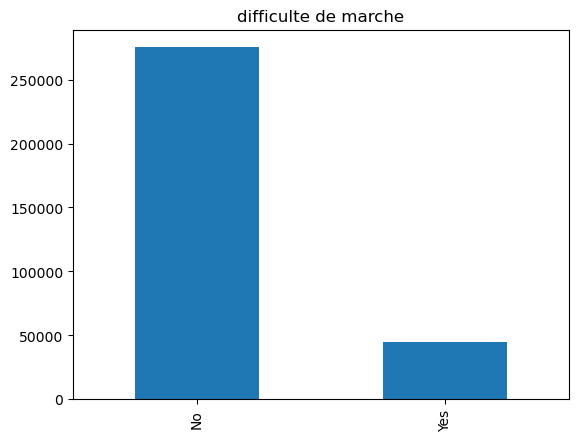

In [15]:
# la variable DiffWalking
print(heart_data.DiffWalking.value_counts())
heart_data.DiffWalking.value_counts().plot.bar().set_title('difficulte de marche')

Female    167805
Male      151990
Name: Sex, dtype: int64


Text(0.5, 1.0, 'sexe')

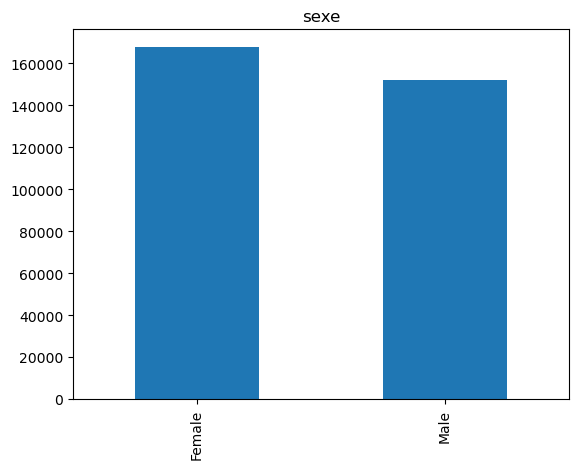

In [16]:
# la variable Sex
print(heart_data.Sex.value_counts())
heart_data.Sex.value_counts().plot.bar().set_title('sexe')

Nous allons separer notre data set en deux pour mieux comprendre le comportement des variable sur chaque sexe 

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64


Text(0.5, 1.0, 'Race')

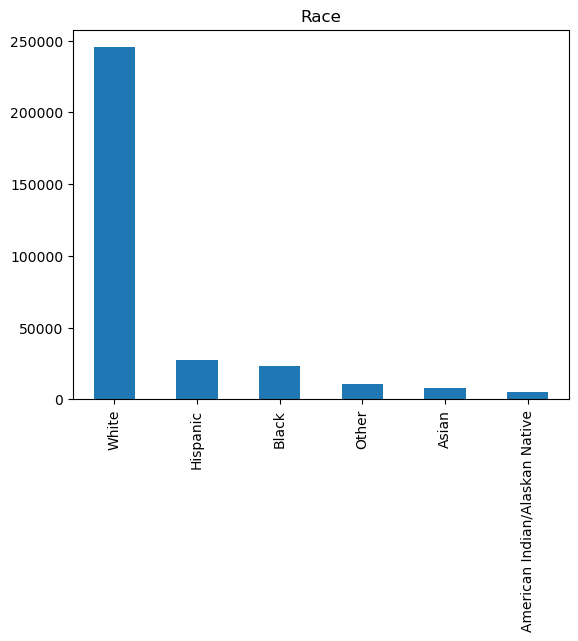

In [17]:
# la variable Race
print(heart_data.Race.value_counts())
heart_data.Race.value_counts().plot.bar().set_title('Race')

**Remarque:** il est claire que la race dominante est la race blanche, ce qui est normal car les donnees ont ete collecte au USA

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64


Text(0.5, 1.0, 'Diabetique')

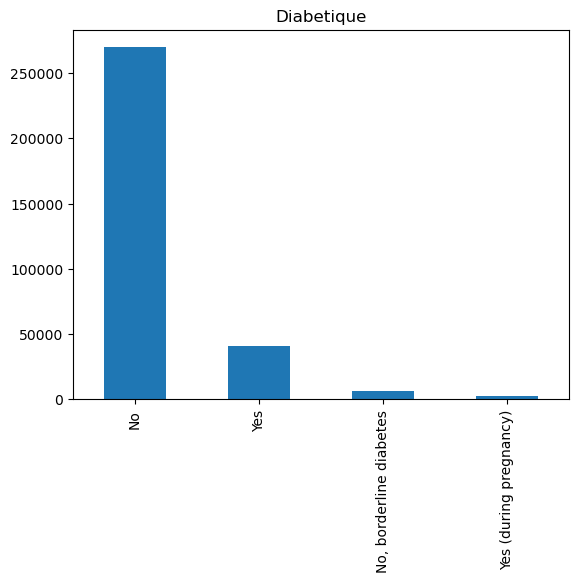

In [18]:
# la variable Diabetic
print(heart_data.Diabetic.value_counts())
heart_data.Diabetic.value_counts().plot.bar().set_title("Diabetique")

**Remarque:** vu la quantite importante des valeurs "NO, borderline diabetes" et "Yes (during pregnancy)", ceci explique le fait ces valeurs ne sont pas la par erreur, ils ont bien leurs places.

Yes    247957
No      71838
Name: PhysicalActivity, dtype: int64


Text(0.5, 1.0, 'Activites physiques')

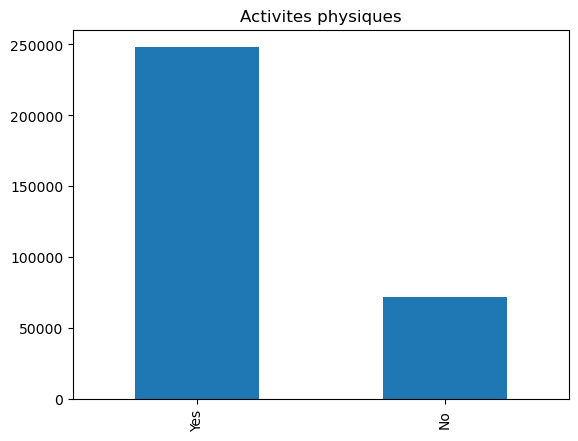

In [19]:
# la variable PhysicalActivity
print(heart_data.PhysicalActivity.value_counts())
heart_data.PhysicalActivity.value_counts().plot.bar().set_title('Activites physiques')

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64


Text(0.5, 1.0, 'Sante generale')

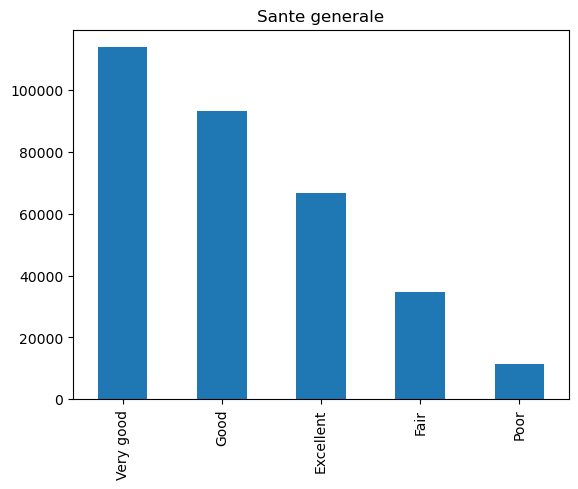

In [20]:
# la variable GenHealth
print(heart_data.GenHealth.value_counts())
heart_data.GenHealth.value_counts().plot.bar().set_title('Sante generale')

**Remarque:** apparemment la majorite des personnes sont en bonne sante, mais nous allons comprendre si la mauvaise sante est due a une age avance

7.0     97751
8.0     97602
6.0     66721
5.0     19184
9.0     16041
10.0     7796
4.0      7750
12.0     2205
3.0      1992
2.0       788
1.0       551
11.0      415
14.0      243
16.0      236
15.0      189
18.0      102
13.0       97
20.0       64
24.0       30
17.0       21
22.0        9
19.0        3
23.0        3
21.0        2
Name: SleepTime, dtype: int64


Text(0.5, 1.0, "Nombre d'heure de sommeil")

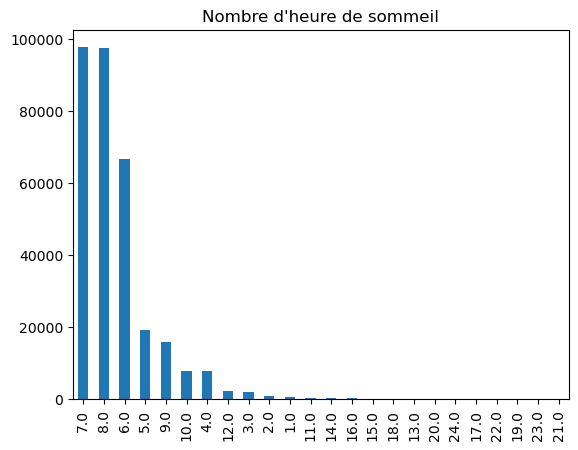

In [21]:
# la variable SleepTime
print(heart_data.SleepTime.value_counts())
heart_data.SleepTime.value_counts().plot.bar().set_title("Nombre d'heure de sommeil")

**Remarque:** Apparamment la majeur partie des personnes interrogees dorment normalement (7 a 8h par jour), mais il y a quelque chose d'intriguant dans tout ceci, d'autre personne ont carrement 24h de sommeil, d'autre 23h, ce qui n'est pas normal.

No     276923
Yes     42872
Name: Asthma, dtype: int64


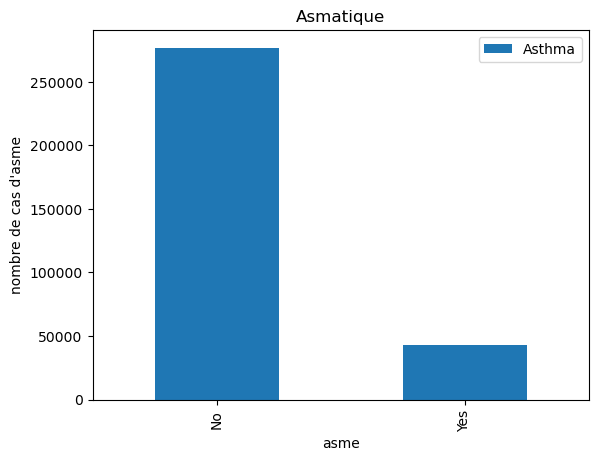

In [22]:
#la variable Asthma
print(heart_data.Asthma.value_counts())
heart_data.Asthma.value_counts().plot.bar().set_title('Asmatique')
plt.xlabel('asme')
plt.ylabel("nombre de cas d'asme")
plt.legend()

No     308016
Yes     11779
Name: KidneyDisease, dtype: int64


Text(0.5, 1.0, 'Maladie renale')

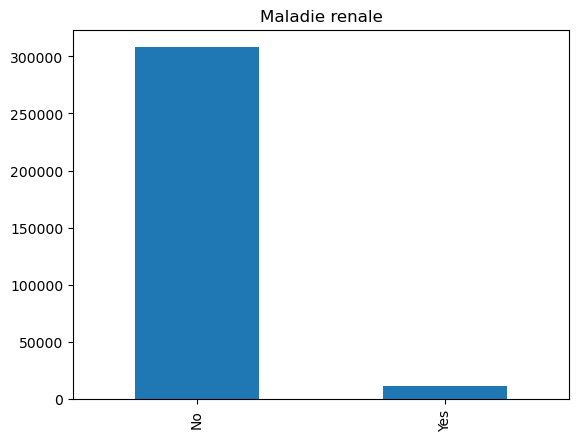

In [23]:
# la variable KidneyDisease
print(heart_data.KidneyDisease.value_counts())
heart_data.KidneyDisease.value_counts().plot.bar().set_title('Maladie renale')

No     289976
Yes     29819
Name: SkinCancer, dtype: int64


Text(0.5, 1.0, 'Cancer de la peau')

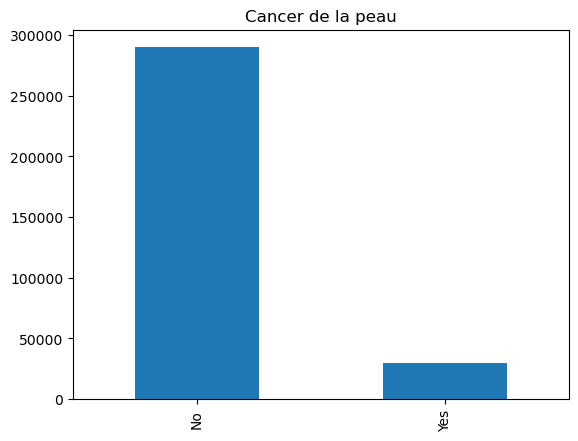

In [24]:
# la variable SkinCancer
print(heart_data.SkinCancer.value_counts())
heart_data.SkinCancer.value_counts().plot.bar().set_title('Cancer de la peau')

## Conclusion generale de l'analyse monovariee

Au theme de notre analyse, nous avons fait les remarques suivantes:
- il y a une forte desequilibre de classe dans les variable, cela risque biaiser notre prediction, il va falloir remedier a ce probleme.
- la variable AgeCategorie presente les age par categorie, nous allons essayer de faire une imputation des ces ages avec les valeurs appropriees
- Mais dans l'ensemble, les informations fournies par les differentes variables sont exploitable, mais vu le probleme que nous voulons resoudre, il est important pour nous de chercher les relations entre ces differentes variables.
- nous remarquons egalement plusieurs incorehence dans notre dataset, surtout au niveau des varibles 'SleepTime', 'Smooking'. Mais nous allons essayer de mieux comprendre cela lors de notre analyse multivariee


<vide>
    

# Analyse multivariees

Nous n'allons pas faire cette analyse car le site officiel de l"OMS [lien](https://www.who.int/fr/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)#:~:text=Les%20principaux%20facteurs%20de%20risques,usage%20nocif%20de%20l'alcool.) nous renseigne suffisemment sur les causes des maladies cardiovasculaires et les precautions a prendre pour ne pas etre victime de cette maladie.